# Lcviz Notebook
This is an auto-generated Jupyter notebook to access the product file(s) **tess2021204101404-s0041-0000000441763252-0212-s_lc.fits** using the
[Lcviz](https://lcviz.readthedocs.io/en/latest/) Python package. 

### Required Packages
This notebook requires the `lcviz` and `astroquery` Python packages.
To install or update `lcviz`, please run:

`pip install -U lcviz`

to install the latest version.  This notebook attempts to download the data using
[astroquery](https://astroquery.readthedocs.io/en/latest/), and requires `astroquery >= 0.4.3`.
To install or update `astroquery`, please run:

`pip install -U astroquery`

### MAST Authentication
If the data are not public, it will attempt to authenticate using your MAST API authentication token. If you do not have one,
see [MAST Auth Info](https://auth.mast.stsci.edu/info) to learn how to create a new token. After creating a valid auth token,
set it to a new environment variable called **MAST_API_TOKEN**.  You can do this either in this notebook using
[os.environ](https://docs.python.org/3/library/os.html#os.environ) or by setting the environment variable in your terminal shell
environment and restarting this notebook.

### Running this notebook
To open this notebook, open a terminal and navigate to the directory where this file is located.  Run the following command:

`jupyter notebook lcviz_notebook_tess2021204101404-s0041-0000000441763252-0212-s_lc.fits.ipynb`

Once open you can run the individual cells below by selecting a cell and hitting `shift+enter`.  Or run all cells by
clicking "Cell -> Run All" from the menu above.


In [1]:
import os
from astroquery.mast import Observations
from lcviz import LCviz

In [6]:
# get authentication token and login
auth_token = os.environ.get('MAST_API_TOKEN', None)
Observations.login(auth_token)

# download the data file
uri = f"mast:tess/product/tess2021204101404-s0041-0000000441763252-0212-s_lc.fits"
result = Observations.download_file(uri, base_url='https://mast.stsci.edu/api/v0.1/Download/file')
if result[0] == 'ERROR':
    raise RuntimeError('Error retrieving file: ' + result[1])
    

INFO:astroquery:If you do not have an API token already, visit the following link to create one: https://auth.mast.stsci.edu/token?suggested_name=Astroquery&suggested_scope=mast:exclusive_access


INFO: If you do not have an API token already, visit the following link to create one: https://auth.mast.stsci.edu/token?suggested_name=Astroquery&suggested_scope=mast:exclusive_access [astroquery.mast.auth]


Enter MAST API Token:  ········


INFO:astroquery:MAST API token accepted, welcome Zijun He
INFO:astroquery:Found cached file /Users/zijunhe/Dropbox/0-Projects/RV_Fitting_Jupyter/MAST_2024-08-30T1131/TESS/tess2021204101404-s0041-0000000441763252-0212-s/tess2021204101404-s0041-0000000441763252-0212-s_lc.fits with expected size 1944000.


INFO: MAST API token accepted, welcome Zijun He [astroquery.mast.auth]
INFO: Found cached file /Users/zijunhe/Dropbox/0-Projects/RV_Fitting_Jupyter/MAST_2024-08-30T1131/TESS/tess2021204101404-s0041-0000000441763252-0212-s/tess2021204101404-s0041-0000000441763252-0212-s_lc.fits with expected size 1944000. [astroquery.query]


In [7]:
# construct the local filepath to load into Lcviz
local = os.path.join(os.path.abspath('.'), uri.rsplit('/', 1)[-1])


In [ ]:
# load the data file and display
h = LCviz()
h.load_data(local)
h.show()

Filename: tess2021204101404-s0041-0000000441763252-0212-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   19149R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


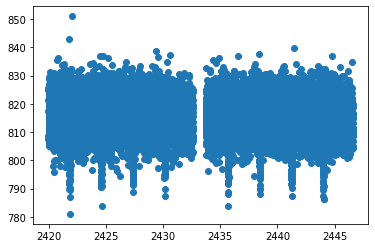

In [15]:
from astropy.io import fits
import matplotlib.pyplot as plt
#import sys
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
flux_clean = []
time_clean = []

fits_filename = 'tess2021204101404-s0041-0000000441763252-0212-s_lc.fits'
hdul = fits.open(fits_filename)
hdul.info()
primary_hdu = hdul[1]
# Get the data (e.g., image or table data)
#data = primary_hdu.data
# Get the header information
header = primary_hdu.header
# Print the header
#print(repr(header))
# Access the table data in the second HDU
table_data = hdul[1].data

# Print the names of the columns
#print(table_data.columns.names)
# Access a specific column
time = table_data['TIME']
flux = table_data['PDCSAP_FLUX']
for i in range(len(flux)):
    if not np.isnan(flux[i]):
        flux_clean.append(flux[i])
        time_clean.append(time[i])
time=np.array(time_clean)
flux=np.array(flux_clean)
plt.plot(time,flux,'o')

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keplersplinev2 import *

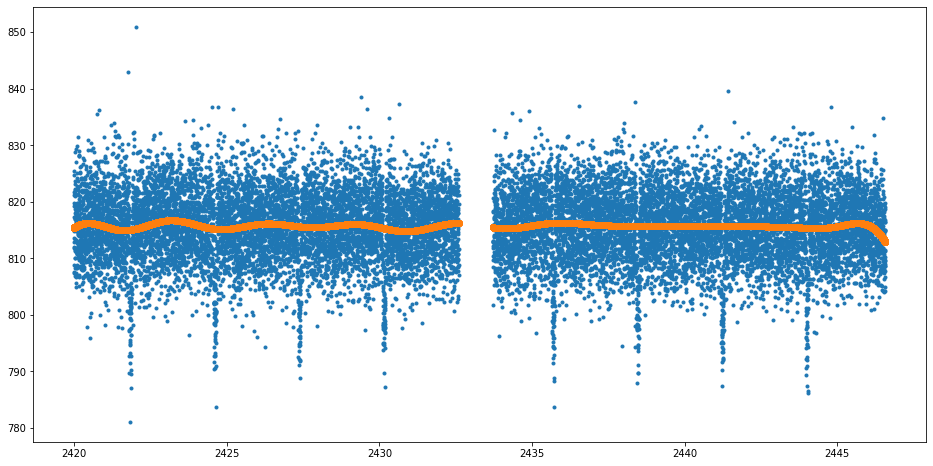

In [17]:
#Calculate a keplerspline with the default bkspacing of 1.5 days between knots: 

s = keplersplinev2(time, flux)
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(time, flux,'.')
plt.plot(time_clean, s,'o')

In [13]:
len(time)    

18322

<class 'list'>
